# gradient descent implementation
using chatgpt to learn about linear regression and implement gradient descent from scratch

*constraints*
* no external libraries except numpy

In [17]:
%load_ext nb_mypy

The nb_mypy extension is already loaded. To reload it, use:
  %reload_ext nb_mypy


completed in 12 iterations
line: y = 7.715041285397711 * X + -1.698972334546264
line: y = 7.715041285397711 * X + -1.698972334546264
line: y = 7.715041285397711 * X + -1.698972334546264
line: y = 7.715041285397711 * X + -1.698972334546264
line: y = 4.525748315136914 * X + -3.3864453256336837
line: y = 1.5947036018506524 * X + -1.7747133439580427
line: y = 0.4992203623793974 * X + -0.29348896345264164
line: y = 0.533907907144918 * X + 0.26012131597586585
line: y = 0.8362825784033645 * X + 0.242591717476853
line: y = 1.0244630466742826 * X + 0.08978451768045273
line: y = 1.0698665986809741 * X + -0.005313826017378023
line: y = 1.0513947038486622 * X + -0.028258835313552496
line: y = 1.0277622695299313 * X + -0.018923931326681846
line: y = 1.017079910340333 * X + -0.006981111851795896
line: y = 1.0161542559180725 * X + -0.001582705337823437


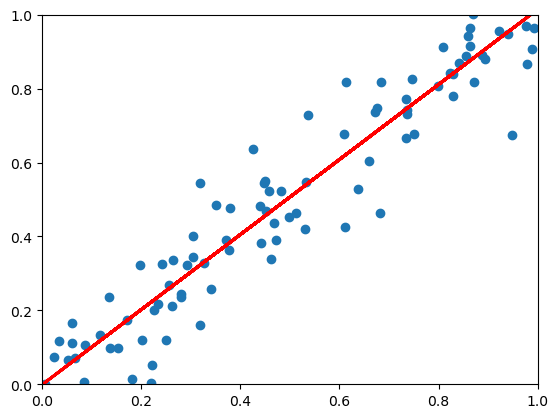

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Tuple, List
from matplotlib.animation import FuncAnimation

# source: ChatGPT
# prompt: generate a scatter plot in matplotlib
# result:
# also generates a linear scatter plot
rng = np.random.default_rng(1234)
def generate_scatter() -> Tuple[np.ndarray, np.ndarray]:
    # Generating some random data for the scatter plot
    x = rng.uniform(0, 1, size=100)
    y = x + rng.normal(loc=0, scale=0.1, size=100)
    return x, y

xn, yn = generate_scatter()

# now write the function to do the gradient descent and allow the user to vary the fit
def fit(x: np.ndarray, y: np.ndarray) -> Tuple[list, list]:
    alpha: float = 0.5
    n = len(x)
    assert len(x) == len(y)
    def f(m: float, b: float) -> Tuple[float, float]:
        new_m = m - alpha * (-2/n) * sum(x * (y - m * x + b))
        new_b = b - alpha * (-2/n) * sum(y - (m * x + b))
        return new_m, new_b
   
 
    m: float = np.random.random()
    b: float = np.random.random()
    mp = m*10
    bp = b*10
    iterations = 0
    precision = 0.005
    mps, bps = [], []
    while abs(mp-m) > precision and abs(bp-b) > precision:
        # mprime, bprime
        m, b = mp, bp
        mp, bp = f(mp, bp)
        mps.append(mp)
        bps.append(bp)
        iterations += 1
        
    print(f"completed in {iterations} iterations")
    return mps, bps
    
mps, bps = fit(xn, yn)
# Creating the figure and axis objects
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
sc = ax.scatter(xn, yn)
# initialize an empty line
line, = ax.plot([], [], lw=2)
line.set_color("r")
fig.xla

# Update function for the animation
def update(frame: int) -> List[plt.Line2D]:
    # Updating the data
    cur_m = mps[frame]
    cur_b = bps[frame]
    new_ys = cur_m * xn + cur_b
    line.set_data(xn, new_ys)
    line_label_val = f"y = {cur_m} * X + {cur_b}"
    return [line]

ani = FuncAnimation(fig, update, frames=len(mps), interval=1000, blit=True)
gif_path = "out.gif"
ani.save(gif_path, writer='pillow', fps=100)